<a href="https://colab.research.google.com/github/Jinimo/Multi_/blob/main/2022.03/python_%E1%84%92%E1%85%A1%E1%86%AB%E1%84%80%E1%85%B3%E1%86%AF%E1%84%8C%E1%85%A1%E1%84%8B%E1%85%B3%E1%86%B7%E1%84%86%E1%85%A9%E1%84%8B%E1%85%B3%E1%86%B7%E1%84%87%E1%85%AE%E1%86%AB%E1%84%85%E1%85%B5_%E1%84%92%E1%85%A2%E1%84%80%E1%85%A7%E1%86%AF%E1%84%87%E1%85%A1%E1%86%BC%E1%84%87%E1%85%A5%E1%86%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 코랩(리눅스)에서 한글 파일명이 자음과 모음으로 분리되는 현상 해결방법
from unicodedata import normalize

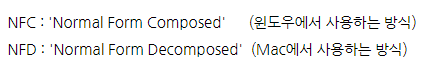

- 파일 생성시 리눅스(맥)에서 사용하는 형식 -> 한글 못불러옴
- 자음 모음이 따로따로 놀아 
-

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 작업 디렉토리로 이동
%cd /content/drive/MyDrive/multi/

In [ ]:
# os 모듈 연결
from unicodedata import normalize # 모듈에 모듈 적용
import os

fnames=os.listdir("./0307/data/images/")

In [ ]:
print(fnames[0][:3])
print(normalize('NFD', fnames[0])[:3])

In [ ]:
from unicodedata import normalize
import os

fnames=os.listdir("./0307/data/images/")
new_fnames=[]

for fname in fnames:
    new_fnames.append(normalize('NFD', fname))

print(new_fnames)

In [ ]:
print(new_fnames[0][:3])

In [ ]:
# 데이터 읽어와 정보 저장하기
from PIL import Image
import pandas as pd

imgInfo=[]  # 파일 정보 저장 리스트 변수 생성

for fname in new_fnames:
    tmp=Image.open("./0307/data/images/"+fname)
    tmpsize=tmp.size   # 이미지 사이즈 튜플 형식으로 저장
    # 파일정보 변수에 저장
    imgInfo.append([fname, tmpsize[0], tmpsize[1]])

    # 강아지/고양이 사이즈 변경(강아지_300*300, 고양이_250*250)
    if fname[:3] == "강아지":
        tmpResize=tmp.resize((300,300))
    else:
        tmpResize=tmp.resize((250,250))

    # 변경 이미지 저장
    tmpResize.save("./0308/"+fname[:3]+"/"+fname) 

print(imgInfo)
print()
print("=== END ===")

df1=pd.DataFrame(imgInfo, columns=["파일명", "가로", "세로"])
df1


In [ ]:
xs